In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
with open('data/all_results.pkl', 'rb') as f:
    data = pickle.load(f)
    results = data['results']
    y_test = data['y_test']

In [ ]:
comparison_df = pd.DataFrame({
    'Modèle': list(results.keys()),
    'Accuracy': [v['accuracy'] for v in results.values()],
    'AUC': [v['auc'] for v in results.values()]
})


print(comparison_df.to_string(index=False))

             Modèle  Accuracy      AUC
        Naive Bayes  0.976682 0.987581
                SVM  0.982960 0.986730
Logistic Regression  0.975785 0.984976
               BERT  0.991031 0.996801


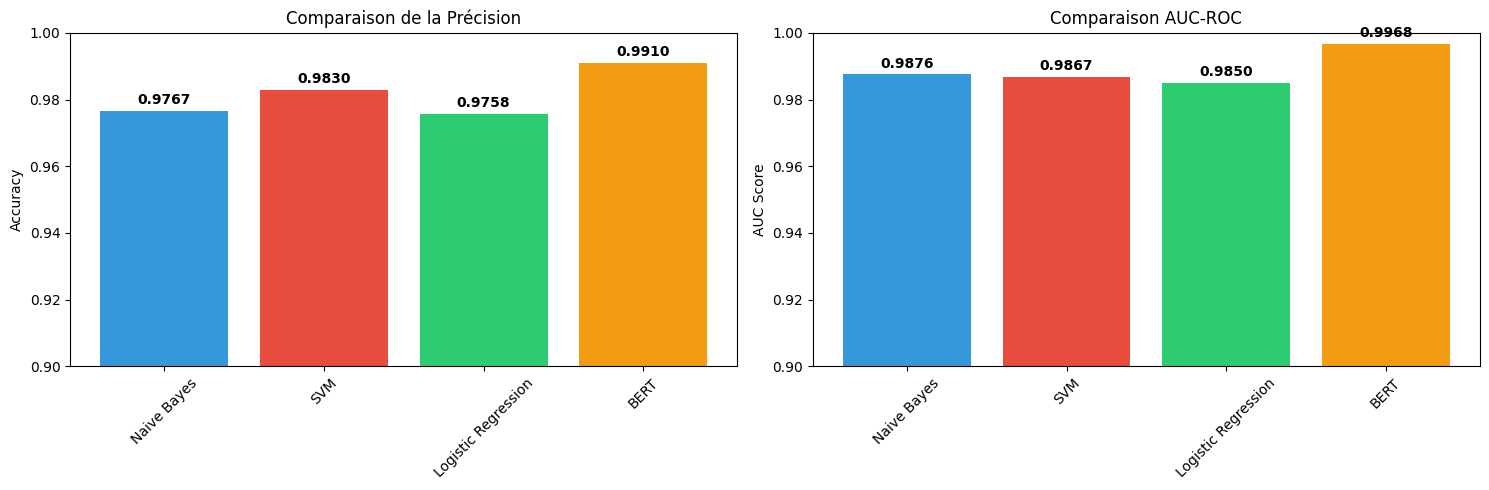

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

axes[0].bar(comparison_df['Modèle'], comparison_df['Accuracy'], color=colors)
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Comparaison de la Précision')
axes[0].set_ylim([0.9, 1.0])
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(comparison_df['Accuracy']):
    axes[0].text(i, v + 0.002, f'{v:.4f}', ha='center', fontweight='bold')

axes[1].bar(comparison_df['Modèle'], comparison_df['AUC'], color=colors)
axes[1].set_ylabel('AUC Score')
axes[1].set_title('Comparaison AUC-ROC')
axes[1].set_ylim([0.9, 1.0])
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(comparison_df['AUC']):
    axes[1].text(i, v + 0.002, f'{v:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/sms_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

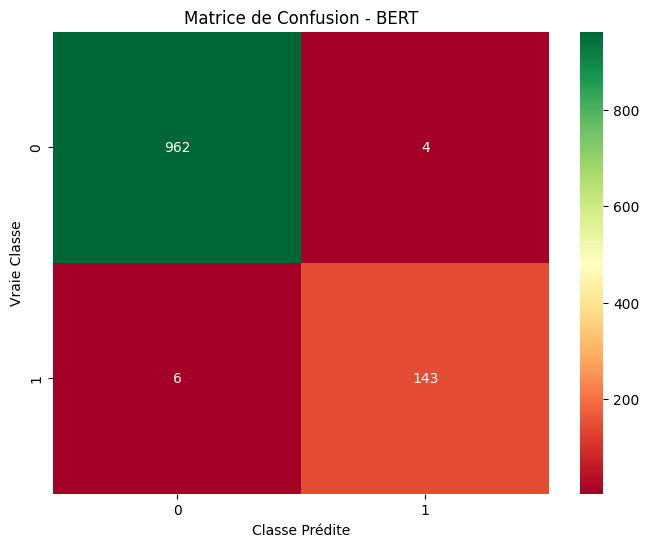

In [ ]:
best_idx = comparison_df['Accuracy'].idxmax()
best_model = comparison_df.loc[best_idx, 'Modèle']
best_pred = results[best_model]['pred']

cm = confusion_matrix(y_test, best_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn', cbar=True)
plt.title(f'Matrice de Confusion - {best_model}')
plt.ylabel('Vraie Classe')
plt.xlabel('Classe Prédite')
plt.savefig('outputs/sms_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print(f"\n🏆 Meilleur modèle: {best_model}")
print(f"   Accuracy: {comparison_df.loc[best_idx, 'Accuracy']:.4f}")
print(f"   AUC: {comparison_df.loc[best_idx, 'AUC']:.4f}")

print(f"\n📊 Classification Report ({best_model}):")
print(classification_report(y_test, best_pred, target_names=['Ham', 'Spam']))


🏆 Meilleur modèle: BERT
   Accuracy: 0.9910
   AUC: 0.9968

📊 Classification Report (BERT):
              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       966
        Spam       0.97      0.96      0.97       149

    accuracy                           0.99      1115
   macro avg       0.98      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115

